In [20]:
from desispec.io import read_spectra
from desispec.io import write_spectra
from desispec.interpolation import resample_flux
from desispec.coaddition import coadd_cameras
from desispec.spectra import Spectra


from glob import glob
import pickle
import glob
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.io import fits

import os
import platform

In [17]:
def sort_sim(sim_file):
    """Read spectra simulated from quickspectra, coadds across cameras 
    and rescales the flux values
    
    Parameters
    ----------
    sim_file : Fits file of 16 simulated spectra generated
    from the same observing conditions

    
    Returns
    -------
    fluxes : ndarray
        Array of coadded fluxes
    """
    specdata = None
    
    for cf in sim_file:
        spectra = read_spectra(cf)
        spectra=coadd_cameras(spectra)
        wave = spectra.wave['brz']
        flux = spectra.flux['brz']*10e-34
        ivar=spectra.ivar['brz']
        #resolution= spectra.resolution['brz']
        mask= spectra.mask['brz']
        spectra_fibermap= spectra.fibermap
        
        
        

        spec = Spectra(['brz'], {'brz' : wave}, {'brz' : flux}, {'brz' : ivar},
                        mask={'brz' : mask},
                        fibermap=spectra_fibermap,
                        single=True)
            
        if specdata is None :
            specdata = spec
        else :
            specdata.update(spec)
    #,rewave,reflux,wave,flux,ivar
    return specdata

In [18]:
sim_file = np.sort(glob.glob((r'/global/homes/e/esepeku/DESI-Timedomain/sims/typeII/ASASSN15oz.0.01593')))
ASASSN15oz=sort_sim(sim_file)

INFO:spectra.py:261:read_spectra: iotime 0.069 sec to read ASASSN15oz.0.01593 at 2021-07-09T07:45:28.165036


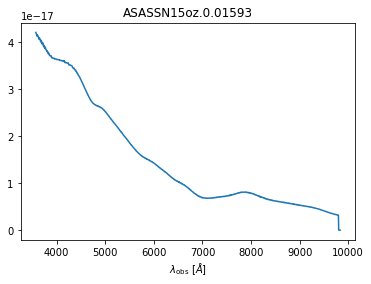

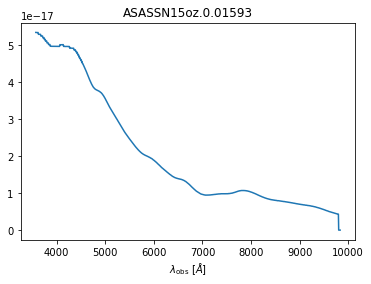

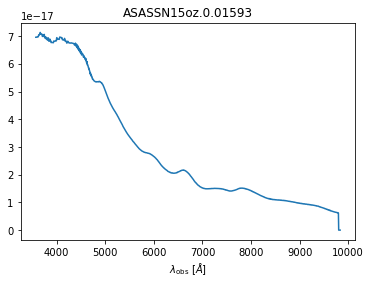

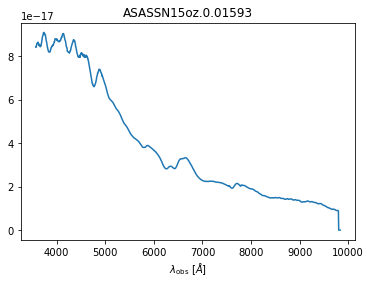

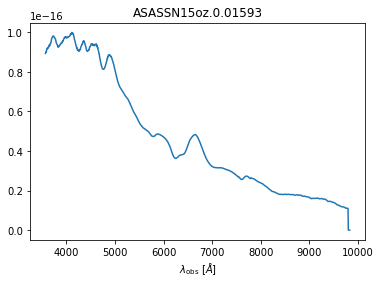

In [19]:
for i in range(5):
    
    spectra=ASASSN15oz[i]
    wave = spectra.wave['brz']
    flux = spectra.flux['brz']
    
    
    fig, ax = plt.subplots()
    ax.plot(wave, flux[0])
    ax.set(xlabel=r'$\lambda_\mathrm{obs}$ [$\AA$]',title='ASASSN15oz.0.01593',)#ylim=(-2,1020)

    plt.show()
    

In [ ]:
write_spectra(spectra_filename, ASASSN15oz)